In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
#import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn import datasets
from sklearn.metrics import mean_squared_error

# import dataset
dfPhiladelphia = pd.read_csv("data/tmp/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733441 entries, 0 to 733440
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   start_date                              733441 non-null  object 
 1   end_date                                733441 non-null  object 
 2   start_time_hourly                       733441 non-null  int64  
 3   end_time_hourly                         733441 non-null  int64  
 4   start_station_id                        733441 non-null  int64  
 5   end_station_id                          733441 non-null  int64  
 6   bike_id                                 733441 non-null  int64  
 7   start_latitude                          733441 non-null  float64
 8   start_longitude                         733441 non-null  float64
 9   end_latitude                            733441 non-null  float64
 10  end_longitude                           7334

Text(0, 0.5, 'bikes')

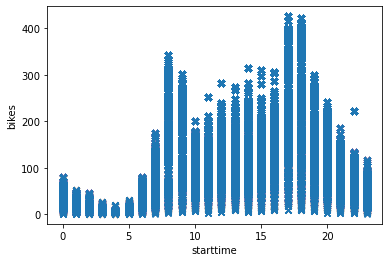

In [2]:
import matplotlib.pyplot as plt

plt.scatter(dfPhiladelphia['start_time_hourly'], dfPhiladelphia['numOfRentedBikesHourly'], marker='x')
plt.xlabel("starttime")
plt.ylabel("bikes")

# 4. Predictive Analytics

- Since the **total system-level demand in the next hour** is of our interest, the station-dependent demand is not needed in this task.
- Our target value is `y = numOfRentedBikes`

## 4.1 Feature Engineering

In this subtask, we will:
- Develop a rich set of features that we expect to be correlated with our target
- We will justify the selection of features

In [5]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733441 entries, 0 to 733440
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_date               733441 non-null  object 
 1   end_date                 733441 non-null  object 
 2   start_time_hourly        733441 non-null  int64  
 3   end_time_hourly          733441 non-null  int64  
 4   start_station_id         733441 non-null  int64  
 5   end_station_id           733441 non-null  int64  
 6   start_latitude           733441 non-null  float64
 7   start_longitude          733441 non-null  float64
 8   end_latitude             733441 non-null  float64
 9   end_longitude            733441 non-null  float64
 10  min_temp                 733441 non-null  float64
 11  max_temp                 733441 non-null  float64
 12  isPrecip                 733441 non-null  bool   
 13  user_type                733441 non-null  object 
 14  dayO

In [3]:
len(dfPhiladelphia)-len(dfPhiladelphia.drop_duplicates(subset = ['start_date', 'start_time_hourly']))

724804

In [4]:
dfPhiladelphia.drop_duplicates(inplace=True, ignore_index = True,subset = ['start_date', 'start_time_hourly'])

In [5]:
dfPhiladelphia

,start_date,end_date,start_time_hourly,end_time_hourly,start_station_id,end_station_id,bike_id,start_latitude,start_longitude,end_latitude,...,tripduration_sec,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly,numOfRentedBikesHourlyStationDependent,start_week,start_month,start_station_name,end_station_name
0,2019-01-01,2019-01-01,0,0,3049,3007,14495,39.945090,-75.142500,39.94517,...,480,2,797,7932,29696,1,1,1,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01,2019-01-01,1,1,3166,3169,14623,39.971950,-75.134450,39.95382,...,780,8,797,7932,29696,1,1,1,Frankford & Belgrade,2nd & Race
2,2019-01-01,2019-01-01,2,2,3016,3154,5277,39.968920,-75.154700,39.95924,...,2280,12,797,7932,29696,1,1,1,"11th & Poplar, John F. Street Community Center",12th & Callowhill
3,2019-01-01,2019-01-01,3,9,3070,3040,11868,39.960620,-75.139830,39.96289,...,24480,9,797,7932,29696,1,1,1,"Spring Garden Station, MFL",17th & Spring Garden
4,2019-01-01,2019-01-01,4,4,3053,3168,14476,39.932310,-75.181540,39.95134,...,720,4,797,7932,29696,1,1,1,Point Breeze & Tasker,20th & Sansom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,2019-12-31,2019-12-31,20,20,3163,3068,16951,39.949740,-75.180970,39.93549,...,603,47,1189,7932,32990,1,1,12,25th & Locust,Broad & Federal
8633,2019-12-31,2019-12-31,21,21,3195,3046,5154,39.954102,-75.169647,39.95012,...,552,39,1189,7932,32990,1,1,12,18th & JFK Curbside,2nd & Market
8634,2019-12-31,2019-12-31,22,22,3049,3034,5198,39.945090,-75.142500,39.93315,...,943,33,1189,7932,32990,2,1,12,Foglietta Plaza,11th & Reed
8635,2019-12-31,2019-12-31,23,23,3046,3154,11901,39.950120,-75.144720,39.95924,...,1126,28,1189,7932,32990,1,1,12,2nd & Market,12th & Callowhill


The feature creation process was already done in task 1: This are all features which we created in Task 1

**Remove unnecessary features**

We won't need:
- 'end_date', because
- 'end_time_hourly', because
- 'start_station_id', because we are interested in the **total system-level demand in the next hour**
- 'end_station_id', because
- 'start_latitude', because
- 'start_longitude', because
- 'end_latitude', because
- 'end_longitude', because
- 'start_station_name', because
- 'end_station_name', because
- 'tripduration_sec', because

We will need:
- 'start_date', because
- 'start_time_hourly', because
- 'numOfRentedBikes', because

We will test/evaluate if we need the following features, in a later step (x.x.x):
- 'min_temp', because
- 'max_temp', because
- 'precip', because
- 'user_type', because
- 'dayOfWeek', because
- 'isWeekend', because
- 'season', because
- 'isHoliday', because
- 'isRushhour', because
- #'tripLengthDistance', because

In [6]:
#Take only necessary columns (implicit drop of unselected columns)
dfPhiladelphia = dfPhiladelphia[['start_date',
                                 'start_time_hourly',
                                 'min_temp',
                                 'max_temp',
                                 'isPrecip',
                                 'user_type',
                                 'start_month',
                                 'dayOfWeek',
                                 'isWeekend',
                                 'season',
                                 'isHoliday',
                                 'isRushhour',
                                 #'tripLengthDistance',
                                 'numOfRentedBikesHourly'
                                ]]

### 4.1.1 Dummy Feature Creation (maybe after evaluation)
- We already created all features we need in Task 1, but we need to change some features into dummy variables to assure predictive performance

In [7]:
# here just 2 blocks of code

### 4.1.2 Justify the selection of features / (Feature evaluation)

In [8]:
# Variance criteria or correlation criteria or filtering or embedded methods
# we will take variance & correlations

#### Variance:

In [10]:
#### take out features which will become dummys
#### season and so on missing, but we do know the variance because, we defined it
dfPhiladelphia[['start_time_hourly', 'min_temp', 'max_temp', 'isPrecip', 'dayOfWeek', 'isWeekend', 'isHoliday', 'isRushhour', 'numOfRentedBikesHourly']].var()

/var/folders/rm/wg58__0d187f9f9gt07rpkw40000gn/T/ipykernel_4111/1893051211.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfPhiladelphia[['start_time_hourly', 'min_temp', 'max_temp', 'isPrecip', 'dayOfWeek', 'isWeekend', 'isHoliday', 'isRushhour', 'numOfRentedBikesHourly']].var()


start_time_hourly           24.980953
min_temp                    87.459441
max_temp                    87.617409
isPrecip                     0.042019
isWeekend                    0.183421
isHoliday                    0.020595
isRushhour                   0.249996
numOfRentedBikesHourly    7758.540098
dtype: float64

In [24]:
# min_temp & max_temp same variance => validate if they have different values

#### Correlations

In [8]:
dfPhiladelphia = dfPhiladelphia[['start_date',
                                 'start_time_hourly',
                                 'min_temp',
                                 'max_temp',
                                 'isPrecip',
                                 'user_type',
                                 'start_month',
                                 'dayOfWeek',
                                 'isWeekend',
                                 'season',
                                 'isHoliday',
                                 'isRushhour',
                                 #'tripLengthDistance',
                                 'numOfRentedBikesHourly'
                                ]]

In [15]:
dfPhiladelphia['dayOfWeek'] = pd.to_datetime(dfPhiladelphia['start_date'].astype(str)).dt.weekday
dfPhiladelphia

,start_date,start_time_hourly,min_temp,max_temp,isPrecip,user_type,start_month,dayOfWeek,isWeekend,season,isHoliday,isRushhour,numOfRentedBikesHourly
0,2019-01-01,0,6.4,6.950,True,Indego30,1,1,False,winter,True,False,2
1,2019-01-01,0,6.4,6.950,True,Day Pass,1,1,False,winter,True,False,2
2,2019-01-01,1,6.8,7.075,True,Indego30,1,1,False,winter,True,False,8
3,2019-01-01,1,6.8,7.075,True,Indego30,1,1,False,winter,True,False,8
4,2019-01-01,1,6.8,7.075,True,Indego30,1,1,False,winter,True,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733436,2019-12-31,23,7.8,7.800,False,Indego365,12,1,False,winter,False,False,28
733437,2019-12-31,23,7.8,7.800,False,Indego30,12,1,False,winter,False,False,28
733438,2020-01-01,0,7.2,7.200,False,Indego30,1,2,False,winter,True,False,3
733439,2020-01-01,0,7.2,7.200,False,Indego365,1,2,False,winter,True,False,3


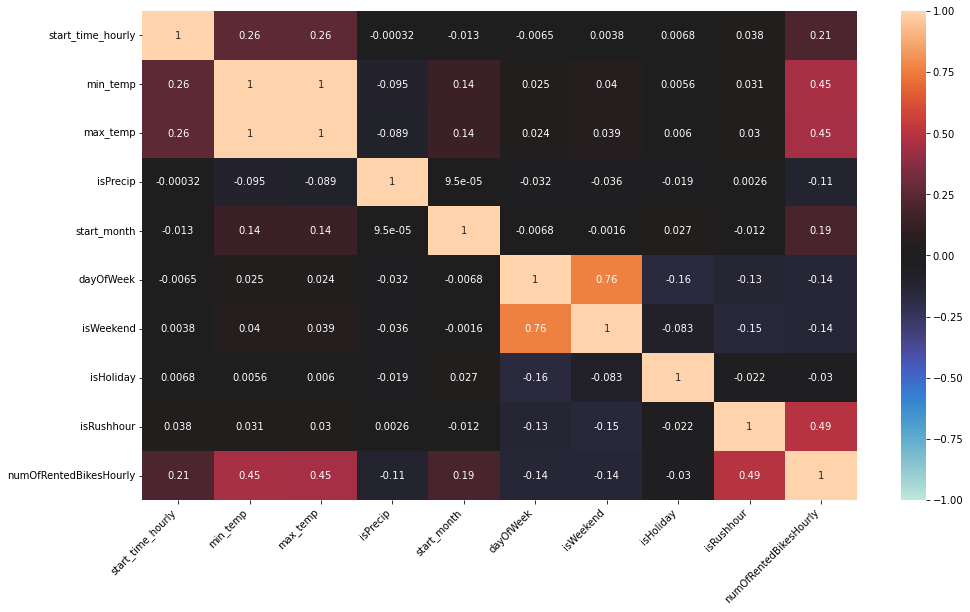

In [16]:
######## make named features like season to 0/1/2/3 so they show up here, before we make them a dummy variable like hours
import seaborn as sns
corr = dfPhiladelphia.corr()
plt.figure(figsize = (16,9))
ax = sns.heatmap(corr, vmin = -1, vmax= 1, center = 0, annot=True)

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = 'right')

ax.set_yticklabels(ax.get_yticklabels(),
                   rotation =0,
                   horizontalalignment = 'right')

plt.show()

#### ISSUMMER ETC ADDEN, user_type, (start_month)

#### Numerical feature selection:
 
We will drop `max_temp` or `min_temp`, because they are perfectly correlated.

In addition to that we will also drop `dayOfWeek`. This is because the correlation between `dayOfWeek` and `isWeekend` as well as the correlation between `dayOfWeek` and `isHoliday` is higher than its correlation with `numOfRentedBikes`. Because the correlation of `isWeekend` and `isHoliday` is lower than the correlation of `dayOfWeek` and `isWeekend` as well as the correlation between `dayOfWeek` and `isHoliday`, we drop `dayOfWeek`.

In [ ]:
#df_for_corr1 = pd.get_dummies(dfPhiladelphia['season'],prefix='is')

#df_for_corr2 = pd.get_dummies(dfPhiladelphia['user_type'],prefix='is')

#df_for_corr3 = pd.get_dummies(dfPhiladelphia['dayOfWeek'],prefix='is')

#df_for_corr1 = df_for_corr1.join(df_for_corr2)

#df_for_corr1 = df_for_corr1.join(df_for_corr3)

#df_for_corr1 = df_for_corr1.join(dfPhiladelphia['numOfRentedBikesHourly'])



In [ ]:
#corr = df_for_corr1.corr()
#plt.figure(figsize = (16,9))
#ax = sns.heatmap(corr, vmin = -1, vmax= 1, center = 0, annot=True)

#ax.set_xticklabels(ax.get_xticklabels(),
 #                 rotation = 45,
  #                horizontalalignment = 'right')

#ax.set_yticklabels(ax.get_yticklabels(),
 #                  rotation =0,
  #                 horizontalalignment = 'right')

#plt.show()

In [7]:
dfPhiladelphia = dfPhiladelphia[[#'start_date',
                                 'start_time_hourly',
                                 #'min_temp',
                                 'max_temp',
                                'isPrecip',
                             #    'user_type',
                                 #'dayOfWeek',
                                 'isWeekend',
                               'season',
                                'start_month',
                                 'isHoliday',
                                 'isRushhour',
                                 #'tripLengthDistance',
                                 'numOfRentedBikesHourly'
                                ]]


### 4.1.3 (Visualisation of dependencies)

## 4.2 Model Building & Evaluation

**Normalize the input values**

In [10]:
#set output frame and input frame
#x = dfPhiladelphia#[[#list all selected input features#]]  

#y = dfPhiladelphia['numOfRentedBikes']

In [8]:
def pipeline_for_prediction(categoric, numeric, model):
    
    numeric_transformer = Pipeline(steps=[("standard_scaler", StandardScaler())])
    categorical_transformer = Pipeline(
        steps=[("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"))]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("numerical scaler", numeric_transformer, numeric),
            ("one hot encoder", categorical_transformer, categoric),
        ]
    )
    pipeline = Pipeline(
        steps=[("preprocessor", preprocessor), ("model", model)]
    )
    return pipeline

In [15]:
# defining categorical and numeric features of dfPhiladelphia

categoric = ['isPrecip', 'start_time_hourly',
                           #    'user_type',
                                 #'dayOfWeek',
                                 'isWeekend',
                                 'start_month',
                                 'season',
                                 'isHoliday',
                                 'isRushhour']
numeric = ['max_temp']


In [16]:
# function for getting different scores for a model

def get_prediction_scores(y_true, y_predicted):
    print("MODEL SCORES:")
    print(f"MAPE: {100 * metrics.mean_absolute_percentage_error(y_true, y_predicted): .3f} %")
    print(f"MAE: {metrics.mean_absolute_error(y_true, y_predicted): .3f}")
    print(f"MSE: {metrics.mean_squared_error(y_true, y_predicted): .3f}")
    print(f"RMSE: {math.sqrt(metrics.mean_squared_error(y_true, y_predicted)): .3f}")
    print(f"R2: {100 * metrics.r2_score(y_true, y_predicted): .3f} %")
    print(f"Max Residual Error: {metrics.max_error(y_true, y_predicted): .3f}")

In [17]:
# function for creating pipeline and fitting model (created by the pipeline), predict and printing scores

def pipeline_fit_predict(reg, categoric, numeric, x_train, y_train, x_val, y_val):
    pipeline = pipeline_for_prediction(categoric, numeric, reg)
    pipeline.fit(x_train, y_train)
    y_predict = pipeline.predict(x_val)
    get_prediction_scores(y_val, y_predict)

In [19]:
# Normalize the data

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#x_norm = scaler.fit_transform(x)

# transform categorical variables (or splitting date in day-month-year)

**Split the dataset in trainset, validationset and testset (50-20-30)**

In [18]:
from sklearn.model_selection import train_test_split

#split the data set in 70% training set and 30% testing set
#x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(dfPhiladelphia.drop('numOfRentedBikesHourly', axis=1)
                                                    , dfPhiladelphia['numOfRentedBikesHourly'], 
                                                    test_size=0.3,random_state=42)

# save the combination of training and validation set in extra variables
x_train_val = x_train
y_train_val = y_train

#split the training data set in 70% training set and 20% validation set to achieve a 50-20-30 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(0.2/0.7), random_state = 42)

**We now have the following datasets:**
- x_train, y_train &rarr; 50% input features for training the model
- x_val, y_val &rarr; 20% to select hyperparameters
- x_test, y_test &rarr; 30% to control the accurancy of the model

### Linear Regression (as Benchmark)

In [13]:
lin_reg = LinearRegression()

In [19]:
pipeline = pipeline_fit_predict(lin_reg, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  204.601 %
MAE:  30.563
MSE:  1729.548
RMSE:  41.588
R2:  71.581 %
Max Residual Error:  188.122


### 4.2.1 First Regression (Decision Tree)

Using Decision Tree Regression to predict the `numOfRentedBikesHourly`.

### ggf nur in test und train

In [20]:
# creating the regression model

tree_reg = DecisionTreeRegressor(criterion="friedman_mse", random_state=42) #squared error 

In [16]:
#tree_reg.fit(x_train,y_train)

In [17]:
#tree_reg.get_depth()

In [18]:
#cc_alp=tree_reg.cost_complexity_pruning_path(x_train,y_train)["ccp_alphas"]
#cc_alp

In [21]:
pipeline = pipeline_fit_predict(tree_reg, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  49.235 %
MAE:  23.073
MSE:  1473.046
RMSE:  38.380
R2:  75.795 %
Max Residual Error:  312.000


In [22]:
#path = tree_reg.cost_complexity_pruning_path(x_train, y_train)
#ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [17]:
tree_reg.get_n_leaves()

9221

In [19]:
len(x_val)

146689

In [21]:
len(x_val)/tree_reg.get_n_leaves()

15.908144452879297

**Looking for the best Hyperparameters**

In [27]:
# function for finding the best hyperparameter by using RandomizedSearchCV and RepeatedStratifiedKFold
"""parameter:
   - pipeline: used pipeline for grid search (the pipeline contains the model)
   - x_val: data set (features) used for grid search
   - y_val: data set (target value) used for grid search
   - model_par: parameters for which the grid search is done
   - score: used score measure 
   - n_iter: how often grid search will be done
   - n_repeats: how often the data set is randomly splitted (by using the same random hyperparameter) in n_splits
   - n_splits: number of splits in RepeatedStratifiedKFold
   - verbose: getting information during the grid search
"""


from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold

def find_best_hyperparameters(pipeline, x_val, y_val, model_par, score, n_iter = 50,  
                                   n_repeats=3, n_splits=5, verbose=True):
    
    print(f"Running grid search for the model based on {score}")
    grid_pipeline = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model_par,
        n_jobs=1,
        n_iter=n_iter,
        cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42),
        scoring=score,
        random_state=42,
        verbose=verbose,
    )
    grid_pipeline.fit(x_val, y_val)
    print(f"Best {score} Score was: {grid_pipeline.best_score_}")
    print("The best hyper parameters for the model are:")
    print(grid_pipeline.best_params_)

In [30]:
from scipy.stats import loguniform

model_para = {'model__max_depth': range(1,51),
              'model__ccp_alpha': loguniform(1e-4, 40e-1)
             }

In [31]:
pipeline = pipeline_for_prediction(categoric, numeric, tree_reg)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['max_temp']),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['isPrecip',
                                                   'start_time_hourly',
                                                   'isWeekend', 'start_month',
                                                   'season', 'isHoliday',
                                                   'isRushhour'])])),
                ('model',
                 DecisionTreeRegressor(criterion='friedman_mse',
                                       random_state=42))])

In [32]:
find_best_hyperparameters(pipeline, x_val, y_val, model_para, score = 'neg_mean_squared_error', verbose=10)

Running grid search for the model based on neg_mean_squared_error
Fitting 15 folds for each of 50 candidates, totalling 750 fits
[CV 1/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 1/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-1956.509 total time=   0.0s
[CV 2/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 2/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-2154.019 total time=   0.0s
[CV 3/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 3/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-2010.841 total time=   0.0s
[CV 4/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 4/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-1769.889 total time=   0.0s
[CV 5/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 9/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-1587.492 total time=   0.0s
[CV 10/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 10/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-2602.840 total time=   0.0s
[CV 11/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 11/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-1849.031 total time=   0.0s
[CV 12/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 12/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-2177.237 total time=   0.0s
[CV 13/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 13/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-1519.415 total time=   0.0s
[CV 14/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 14

[CV 12/15; 4/50] END model__ccp_alpha=0.011265463757625072, model__max_depth=23;, score=-2096.182 total time=   0.0s
[CV 13/15; 4/50] START model__ccp_alpha=0.011265463757625072, model__max_depth=23
[CV 13/15; 4/50] END model__ccp_alpha=0.011265463757625072, model__max_depth=23;, score=-1665.151 total time=   0.0s
[CV 14/15; 4/50] START model__ccp_alpha=0.011265463757625072, model__max_depth=23
[CV 14/15; 4/50] END model__ccp_alpha=0.011265463757625072, model__max_depth=23;, score=-2004.123 total time=   0.0s
[CV 15/15; 4/50] START model__ccp_alpha=0.011265463757625072, model__max_depth=23
[CV 15/15; 4/50] END model__ccp_alpha=0.011265463757625072, model__max_depth=23;, score=-1942.026 total time=   0.0s
[CV 1/15; 5/50] START model__ccp_alpha=0.0001850564674774931, model__max_depth=24
[CV 1/15; 5/50] END model__ccp_alpha=0.0001850564674774931, model__max_depth=24;, score=-2041.006 total time=   0.0s
[CV 2/15; 5/50] START model__ccp_alpha=0.0001850564674774931, model__max_depth=24
[CV 2

[CV 11/15; 7/50] END model__ccp_alpha=0.18138128787747848, model__max_depth=22;, score=-1844.199 total time=   0.0s
[CV 12/15; 7/50] START model__ccp_alpha=0.18138128787747848, model__max_depth=22
[CV 12/15; 7/50] END model__ccp_alpha=0.18138128787747848, model__max_depth=22;, score=-2041.018 total time=   0.0s
[CV 13/15; 7/50] START model__ccp_alpha=0.18138128787747848, model__max_depth=22
[CV 13/15; 7/50] END model__ccp_alpha=0.18138128787747848, model__max_depth=22;, score=-1501.951 total time=   0.0s
[CV 14/15; 7/50] START model__ccp_alpha=0.18138128787747848, model__max_depth=22
[CV 14/15; 7/50] END model__ccp_alpha=0.18138128787747848, model__max_depth=22;, score=-1959.219 total time=   0.0s
[CV 15/15; 7/50] START model__ccp_alpha=0.18138128787747848, model__max_depth=22
[CV 15/15; 7/50] END model__ccp_alpha=0.18138128787747848, model__max_depth=22;, score=-1359.828 total time=   0.0s
[CV 1/15; 8/50] START model__ccp_alpha=0.0001818065270847824, model__max_depth=24
[CV 1/15; 8/50

[CV 3/15; 11/50] END model__ccp_alpha=0.0694523509064026, model__max_depth=22;, score=-1884.634 total time=   0.0s
[CV 4/15; 11/50] START model__ccp_alpha=0.0694523509064026, model__max_depth=22.
[CV 4/15; 11/50] END model__ccp_alpha=0.0694523509064026, model__max_depth=22;, score=-1776.491 total time=   0.0s
[CV 5/15; 11/50] START model__ccp_alpha=0.0694523509064026, model__max_depth=22.
[CV 5/15; 11/50] END model__ccp_alpha=0.0694523509064026, model__max_depth=22;, score=-2399.086 total time=   0.0s
[CV 6/15; 11/50] START model__ccp_alpha=0.0694523509064026, model__max_depth=22.
[CV 6/15; 11/50] END model__ccp_alpha=0.0694523509064026, model__max_depth=22;, score=-1980.428 total time=   0.0s
[CV 7/15; 11/50] START model__ccp_alpha=0.0694523509064026, model__max_depth=22.
[CV 7/15; 11/50] END model__ccp_alpha=0.0694523509064026, model__max_depth=22;, score=-1982.647 total time=   0.0s
[CV 8/15; 11/50] START model__ccp_alpha=0.0694523509064026, model__max_depth=22.
[CV 8/15; 11/50] END

[CV 1/15; 14/50] END model__ccp_alpha=0.00016396765350421135, model__max_depth=16;, score=-1841.192 total time=   0.0s
[CV 2/15; 14/50] START model__ccp_alpha=0.00016396765350421135, model__max_depth=16
[CV 2/15; 14/50] END model__ccp_alpha=0.00016396765350421135, model__max_depth=16;, score=-2055.753 total time=   0.0s
[CV 3/15; 14/50] START model__ccp_alpha=0.00016396765350421135, model__max_depth=16
[CV 3/15; 14/50] END model__ccp_alpha=0.00016396765350421135, model__max_depth=16;, score=-1822.118 total time=   0.0s
[CV 4/15; 14/50] START model__ccp_alpha=0.00016396765350421135, model__max_depth=16
[CV 4/15; 14/50] END model__ccp_alpha=0.00016396765350421135, model__max_depth=16;, score=-1720.621 total time=   0.0s
[CV 5/15; 14/50] START model__ccp_alpha=0.00016396765350421135, model__max_depth=16
[CV 5/15; 14/50] END model__ccp_alpha=0.00016396765350421135, model__max_depth=16;, score=-2321.368 total time=   0.0s
[CV 6/15; 14/50] START model__ccp_alpha=0.00016396765350421135, model

[CV 1/15; 17/50] END model__ccp_alpha=0.023256145462018832, model__max_depth=3;, score=-3602.143 total time=   0.0s
[CV 2/15; 17/50] START model__ccp_alpha=0.023256145462018832, model__max_depth=3
[CV 2/15; 17/50] END model__ccp_alpha=0.023256145462018832, model__max_depth=3;, score=-3495.615 total time=   0.0s
[CV 3/15; 17/50] START model__ccp_alpha=0.023256145462018832, model__max_depth=3
[CV 3/15; 17/50] END model__ccp_alpha=0.023256145462018832, model__max_depth=3;, score=-3330.400 total time=   0.0s
[CV 4/15; 17/50] START model__ccp_alpha=0.023256145462018832, model__max_depth=3
[CV 4/15; 17/50] END model__ccp_alpha=0.023256145462018832, model__max_depth=3;, score=-3659.716 total time=   0.0s
[CV 5/15; 17/50] START model__ccp_alpha=0.023256145462018832, model__max_depth=3
[CV 5/15; 17/50] END model__ccp_alpha=0.023256145462018832, model__max_depth=3;, score=-3267.510 total time=   0.0s
[CV 6/15; 17/50] START model__ccp_alpha=0.023256145462018832, model__max_depth=3
[CV 6/15; 17/50

[CV 1/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-1901.056 total time=   0.0s
[CV 2/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model__max_depth=25
[CV 2/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-2163.983 total time=   0.0s
[CV 3/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model__max_depth=25
[CV 3/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-1768.369 total time=   0.0s
[CV 4/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model__max_depth=25
[CV 4/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-1646.249 total time=   0.0s
[CV 5/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model__max_depth=25
[CV 5/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-2376.465 total time=   0.0s
[CV 6/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model

[CV 1/15; 23/50] END model__ccp_alpha=0.00028150941749886896, model__max_depth=20;, score=-1825.778 total time=   0.0s
[CV 2/15; 23/50] START model__ccp_alpha=0.00028150941749886896, model__max_depth=20
[CV 2/15; 23/50] END model__ccp_alpha=0.00028150941749886896, model__max_depth=20;, score=-2002.555 total time=   0.0s
[CV 3/15; 23/50] START model__ccp_alpha=0.00028150941749886896, model__max_depth=20
[CV 3/15; 23/50] END model__ccp_alpha=0.00028150941749886896, model__max_depth=20;, score=-1912.500 total time=   0.0s
[CV 4/15; 23/50] START model__ccp_alpha=0.00028150941749886896, model__max_depth=20
[CV 4/15; 23/50] END model__ccp_alpha=0.00028150941749886896, model__max_depth=20;, score=-1678.212 total time=   0.0s
[CV 5/15; 23/50] START model__ccp_alpha=0.00028150941749886896, model__max_depth=20
[CV 5/15; 23/50] END model__ccp_alpha=0.00028150941749886896, model__max_depth=20;, score=-2397.671 total time=   0.0s
[CV 6/15; 23/50] START model__ccp_alpha=0.00028150941749886896, model

[CV 1/15; 26/50] END model__ccp_alpha=0.000143965369814854, model__max_depth=14;, score=-1873.191 total time=   0.0s
[CV 2/15; 26/50] START model__ccp_alpha=0.000143965369814854, model__max_depth=14
[CV 2/15; 26/50] END model__ccp_alpha=0.000143965369814854, model__max_depth=14;, score=-2009.616 total time=   0.0s
[CV 3/15; 26/50] START model__ccp_alpha=0.000143965369814854, model__max_depth=14
[CV 3/15; 26/50] END model__ccp_alpha=0.000143965369814854, model__max_depth=14;, score=-1872.159 total time=   0.0s
[CV 4/15; 26/50] START model__ccp_alpha=0.000143965369814854, model__max_depth=14
[CV 4/15; 26/50] END model__ccp_alpha=0.000143965369814854, model__max_depth=14;, score=-1641.018 total time=   0.0s
[CV 5/15; 26/50] START model__ccp_alpha=0.000143965369814854, model__max_depth=14
[CV 5/15; 26/50] END model__ccp_alpha=0.000143965369814854, model__max_depth=14;, score=-2330.081 total time=   0.0s
[CV 6/15; 26/50] START model__ccp_alpha=0.000143965369814854, model__max_depth=14
[CV 6

[CV 5/15; 29/50] END model__ccp_alpha=0.009048838560499841, model__max_depth=42;, score=-2337.043 total time=   0.0s
[CV 6/15; 29/50] START model__ccp_alpha=0.009048838560499841, model__max_depth=42
[CV 6/15; 29/50] END model__ccp_alpha=0.009048838560499841, model__max_depth=42;, score=-2028.115 total time=   0.0s
[CV 7/15; 29/50] START model__ccp_alpha=0.009048838560499841, model__max_depth=42
[CV 7/15; 29/50] END model__ccp_alpha=0.009048838560499841, model__max_depth=42;, score=-1984.557 total time=   0.0s
[CV 8/15; 29/50] START model__ccp_alpha=0.009048838560499841, model__max_depth=42
[CV 8/15; 29/50] END model__ccp_alpha=0.009048838560499841, model__max_depth=42;, score=-1834.098 total time=   0.0s
[CV 9/15; 29/50] START model__ccp_alpha=0.009048838560499841, model__max_depth=42
[CV 9/15; 29/50] END model__ccp_alpha=0.009048838560499841, model__max_depth=42;, score=-1577.135 total time=   0.0s
[CV 10/15; 29/50] START model__ccp_alpha=0.009048838560499841, model__max_depth=42
[CV 

[CV 10/15; 32/50] END model__ccp_alpha=0.011743444594199003, model__max_depth=10;, score=-2121.822 total time=   0.0s
[CV 11/15; 32/50] START model__ccp_alpha=0.011743444594199003, model__max_depth=10
[CV 11/15; 32/50] END model__ccp_alpha=0.011743444594199003, model__max_depth=10;, score=-1744.434 total time=   0.0s
[CV 12/15; 32/50] START model__ccp_alpha=0.011743444594199003, model__max_depth=10
[CV 12/15; 32/50] END model__ccp_alpha=0.011743444594199003, model__max_depth=10;, score=-1844.302 total time=   0.0s
[CV 13/15; 32/50] START model__ccp_alpha=0.011743444594199003, model__max_depth=10
[CV 13/15; 32/50] END model__ccp_alpha=0.011743444594199003, model__max_depth=10;, score=-1685.078 total time=   0.0s
[CV 14/15; 32/50] START model__ccp_alpha=0.011743444594199003, model__max_depth=10
[CV 14/15; 32/50] END model__ccp_alpha=0.011743444594199003, model__max_depth=10;, score=-1749.711 total time=   0.0s
[CV 15/15; 32/50] START model__ccp_alpha=0.011743444594199003, model__max_dept

[CV 9/15; 35/50] END model__ccp_alpha=0.00025541582590476536, model__max_depth=23;, score=-1723.980 total time=   0.0s
[CV 10/15; 35/50] START model__ccp_alpha=0.00025541582590476536, model__max_depth=23
[CV 10/15; 35/50] END model__ccp_alpha=0.00025541582590476536, model__max_depth=23;, score=-2092.290 total time=   0.0s
[CV 11/15; 35/50] START model__ccp_alpha=0.00025541582590476536, model__max_depth=23
[CV 11/15; 35/50] END model__ccp_alpha=0.00025541582590476536, model__max_depth=23;, score=-1873.330 total time=   0.0s
[CV 12/15; 35/50] START model__ccp_alpha=0.00025541582590476536, model__max_depth=23
[CV 12/15; 35/50] END model__ccp_alpha=0.00025541582590476536, model__max_depth=23;, score=-2090.559 total time=   0.0s
[CV 13/15; 35/50] START model__ccp_alpha=0.00025541582590476536, model__max_depth=23
[CV 13/15; 35/50] END model__ccp_alpha=0.00025541582590476536, model__max_depth=23;, score=-1668.155 total time=   0.0s
[CV 14/15; 35/50] START model__ccp_alpha=0.000255415825904765

[CV 1/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-1832.968 total time=   0.0s
[CV 2/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 2/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-2154.240 total time=   0.0s
[CV 3/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 3/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-2010.910 total time=   0.0s
[CV 4/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 4/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-1804.335 total time=   0.0s
[CV 5/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 5/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-2337.137 total time=   0.0s
[CV 6/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 6

[CV 4/15; 42/50] END model__ccp_alpha=3.481071045200102, model__max_depth=24;, score=-1385.855 total time=   0.0s
[CV 5/15; 42/50] START model__ccp_alpha=3.481071045200102, model__max_depth=24..
[CV 5/15; 42/50] END model__ccp_alpha=3.481071045200102, model__max_depth=24;, score=-2030.026 total time=   0.0s
[CV 6/15; 42/50] START model__ccp_alpha=3.481071045200102, model__max_depth=24..
[CV 6/15; 42/50] END model__ccp_alpha=3.481071045200102, model__max_depth=24;, score=-1845.455 total time=   0.0s
[CV 7/15; 42/50] START model__ccp_alpha=3.481071045200102, model__max_depth=24..
[CV 7/15; 42/50] END model__ccp_alpha=3.481071045200102, model__max_depth=24;, score=-1721.751 total time=   0.0s
[CV 8/15; 42/50] START model__ccp_alpha=3.481071045200102, model__max_depth=24..
[CV 8/15; 42/50] END model__ccp_alpha=3.481071045200102, model__max_depth=24;, score=-1616.395 total time=   0.0s
[CV 9/15; 42/50] START model__ccp_alpha=3.481071045200102, model__max_depth=24..
[CV 9/15; 42/50] END mode

[CV 2/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-2156.363 total time=   0.0s
[CV 3/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 3/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-1631.822 total time=   0.0s
[CV 4/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 4/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-1816.521 total time=   0.0s
[CV 5/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 5/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-2037.259 total time=   0.0s
[CV 6/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 6/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-1967.606 total time=   0.0s
[CV 7/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 7

[CV 2/15; 48/50] END model__ccp_alpha=0.004463553942105087, model__max_depth=41;, score=-2154.240 total time=   0.0s
[CV 3/15; 48/50] START model__ccp_alpha=0.004463553942105087, model__max_depth=41
[CV 3/15; 48/50] END model__ccp_alpha=0.004463553942105087, model__max_depth=41;, score=-2010.910 total time=   0.0s
[CV 4/15; 48/50] START model__ccp_alpha=0.004463553942105087, model__max_depth=41
[CV 4/15; 48/50] END model__ccp_alpha=0.004463553942105087, model__max_depth=41;, score=-1804.335 total time=   0.0s
[CV 5/15; 48/50] START model__ccp_alpha=0.004463553942105087, model__max_depth=41
[CV 5/15; 48/50] END model__ccp_alpha=0.004463553942105087, model__max_depth=41;, score=-2337.137 total time=   0.0s
[CV 6/15; 48/50] START model__ccp_alpha=0.004463553942105087, model__max_depth=41
[CV 6/15; 48/50] END model__ccp_alpha=0.004463553942105087, model__max_depth=41;, score=-2028.132 total time=   0.0s
[CV 7/15; 48/50] START model__ccp_alpha=0.004463553942105087, model__max_depth=41
[CV 7

Best neg_mean_squared_error Score was: -1675.9642665868148
The best hyper parameters for the model are:
{'model__ccp_alpha': 3.481071045200102, 'model__max_depth': 24}


**Training the model with the best hyperparameters**

In [33]:
tree_reg_last = DecisionTreeRegressor(criterion="friedman_mse", max_depth = 24, ccp_alpha = 3.481071045200102)

In [34]:
pipeline_last = pipeline_fit_predict(tree_reg_last, categoric, numeric, x_val, y_val, x_test, y_test)

MODEL SCORES:
MAPE:  80.092 %
MAE:  23.825
MSE:  1418.539
RMSE:  37.663
R2:  77.612 %
Max Residual Error:  283.500


In [10]:
# plot decision tree

from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn import tree

def plot_regression_tree_sklearn(tree_depth):

    # Fit regression model (to full data)
    model = DecisionTreeRegressor(max_depth=tree_depth)
    model.fit(dfPhiladelphia['max_temp'].values.reshape((-1,1)), dfPhiladelphia['numOfRentedBikesHourly'].values) 
    
    dot_data = export_graphviz(model,
                              feature_names=["max_temp"])  
    
    graph = graphviz.Source(dot_data) 
    
    
    return graph

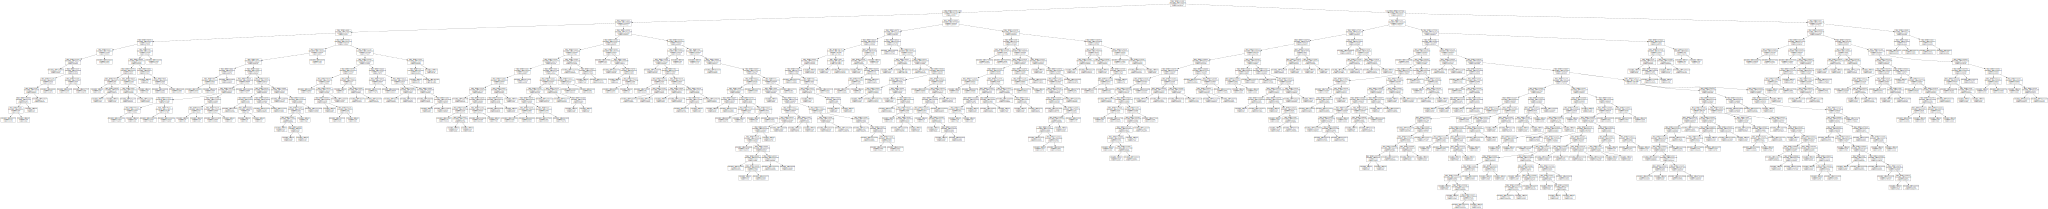

In [11]:
plot_regression_tree_sklearn(39)

### Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures()
lin_reg = LinearRegression()

In [16]:
pipeline = pipeline_for_prediction(categoric,numeric,poly_reg)

In [20]:
x_poly_train = pipeline.fit_transform(x_train)
x_poly_val = pipeline.fit_transform(x_val)
x_poly_test = pipeline.fit_transform(x_test)

<366719x1540 sparse matrix of type '<class 'numpy.float64'>'
	with 20169545 stored elements in Compressed Sparse Row format>

In [21]:
lin_reg.fit(x_poly_train, y_train)

LinearRegression()

In [22]:
lin_pred = lin_reg.predict(x_poly_val)

In [24]:
get_prediction_scores(y_val, lin_pred)

MODEL SCORES:
MAPE:  22.318 %
MAE:  21.522
MSE:  945.248
RMSE:  30.745
R2:  87.842 %
Max Residual Error:  295.107


In [ ]:
model_para = {'model__degree': range(2,10)}

In [ ]:
for d in range(2,10):
    pipeline = pipeline_for_prediction(categoric,numeric,poly_reg)
    x_poly_val = pipeline.fit_transform(x_val)
    find_best_hyperparameters(lin_reg, x_poly_val, y_val, d, score = 'neg_mean_squared_error', verbose=10)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10,criterion="friedman_mse", random_state=42) 

In [39]:
pipeline = pipeline_fit_predict(forest_reg, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  4.379 %
MAE:  5.214
MSE:  178.229
RMSE:  13.350
R2:  97.708 %
Max Residual Error:  297.738


In [40]:
from scipy.stats import loguniform
model_para = {'model__max_depth': range(1,51),
              'model__ccp_alpha': loguniform(1e-4, 40e-1)
             }

In [41]:
pipeline = pipeline_for_prediction(categoric, numeric, forest_reg)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['max_temp']),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['isPrecip',
                                                   'start_time_hourly',
                                                   'user_type', 'isWeekend',
                                                   'start_month', 'season',
                                                   'isHoliday',
                                                   'isRushhour'])])),
                ('model',
                 RandomForestRegressor(criterion='friedman_mse',
                                       n_estimators=10, random_state=42))])

In [42]:
find_best_hyperparameters(pipeline, x_val, y_val, model_para, score = 'neg_mean_squared_error', verbose=10)

Running grid search for the model based on neg_mean_squared_error
Fitting 15 folds for each of 50 candidates, totalling 750 fits
[CV 1/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 1/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-206.376 total time=  15.8s
[CV 7/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 7/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-195.458 total time=  15.0s
[CV 9/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 9/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-195.892 total time=  15.7s
[CV 14/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 14/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-197.632 total time=  15.3s
[CV 7/15; 2/50] START model__ccp_alpha=0.000698518491527025, model__max_depth=8.
[CV 

/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 4/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-199.156 total time=  15.8s
[CV 8/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 8/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-188.325 total time=  15.6s
[CV 12/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 12/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-195.207 total time=  15.8s
[CV 1/15; 2/50] START model__ccp_alpha=0.000698518491527025, model__max_depth=8.
[CV 1/15; 2/50] END model__ccp_alpha=0.000698518491527025, model__max_depth=8;, score=-1687.060 total time=   3.0s
[CV 2/15; 2/50] START model__ccp_alpha=0.000698518491527025, model__max_depth=8.
[CV 2/15; 2/50] END model__ccp_alpha=0.000698518491527025, model__max_depth=8;, score=-1627.492 total time=   3.2s
[CV 3/15; 2/50] ST

[CV 3/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 3/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-184.783 total time=  15.4s
[CV 6/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 6/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-200.291 total time=  15.8s
[CV 11/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 11/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-203.705 total time=  15.8s
[CV 15/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 15/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-183.646 total time=  15.6s
[CV 8/15; 2/50] START model__ccp_alpha=0.000698518491527025, model__max_depth=8.
[CV 8/15; 2/50] END model__ccp_alpha=0.000698518491527025, model__max_depth=8;, score=-1709.550 total time=   3.2s
[CV 12/15; 2/50]

[CV 2/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 2/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-197.429 total time=  15.3s
[CV 5/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 5/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-188.530 total time=  15.6s
[CV 10/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 10/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-188.055 total time=  14.9s
[CV 13/15; 1/50] START model__ccp_alpha=0.005292441863767901, model__max_depth=29
[CV 13/15; 1/50] END model__ccp_alpha=0.005292441863767901, model__max_depth=29;, score=-188.409 total time=  15.6s
[CV 6/15; 2/50] START model__ccp_alpha=0.000698518491527025, model__max_depth=8.
[CV 6/15; 2/50] END model__ccp_alpha=0.000698518491527025, model__max_depth=8;, score=-1689.070 total time=   3.1s
[CV 10/15; 2/50]

[CV 9/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model__max_depth=25
[CV 9/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-221.340 total time=  14.3s
[CV 13/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model__max_depth=25
[CV 13/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-207.707 total time=  14.3s
[CV 2/15; 21/50] START model__ccp_alpha=2.7790511850146156, model__max_depth=50.
[CV 2/15; 21/50] END model__ccp_alpha=2.7790511850146156, model__max_depth=50;, score=-857.970 total time=  16.4s
[CV 6/15; 21/50] START model__ccp_alpha=2.7790511850146156, model__max_depth=50.
[CV 6/15; 21/50] END model__ccp_alpha=2.7790511850146156, model__max_depth=50;, score=-856.029 total time=  16.6s
[CV 10/15; 21/50] START model__ccp_alpha=2.7790511850146156, model__max_depth=50
[CV 10/15; 21/50] END model__ccp_alpha=2.7790511850146156, model__max_depth=50;, score=-867.015 total time=  16.5s
[CV 14/1

[CV 15/15; 21/50] END model__ccp_alpha=2.7790511850146156, model__max_depth=50;, score=-842.019 total time=  16.4s
[CV 5/15; 22/50] START model__ccp_alpha=0.005938952698993865, model__max_depth=26
[CV 5/15; 22/50] END model__ccp_alpha=0.005938952698993865, model__max_depth=26;, score=-202.902 total time=  15.1s
[CV 9/15; 22/50] START model__ccp_alpha=0.005938952698993865, model__max_depth=26
[CV 9/15; 22/50] END model__ccp_alpha=0.005938952698993865, model__max_depth=26;, score=-212.689 total time=  15.0s
[CV 13/15; 22/50] START model__ccp_alpha=0.005938952698993865, model__max_depth=26
[CV 13/15; 22/50] END model__ccp_alpha=0.005938952698993865, model__max_depth=26;, score=-201.928 total time=  15.1s
[CV 2/15; 23/50] START model__ccp_alpha=0.00028150941749886896, model__max_depth=20
[CV 2/15; 23/50] END model__ccp_alpha=0.00028150941749886896, model__max_depth=20;, score=-270.778 total time=  12.8s
[CV 6/15; 23/50] START model__ccp_alpha=0.00028150941749886896, model__max_depth=20
[CV

Best neg_mean_squared_error Score was: -185.38784376695045
The best hyper parameters for the model are:
{'model__ccp_alpha': 0.0006092032999616391, 'model__max_depth': 39}
[CV 6/15; 19/50] START model__ccp_alpha=0.0006092032999616391, model__max_depth=39
[CV 6/15; 19/50] END model__ccp_alpha=0.0006092032999616391, model__max_depth=39;, score=-191.540 total time=  15.7s
[CV 11/15; 19/50] START model__ccp_alpha=0.0006092032999616391, model__max_depth=39
[CV 11/15; 19/50] END model__ccp_alpha=0.0006092032999616391, model__max_depth=39;, score=-193.933 total time=  15.6s
[CV 15/15; 19/50] START model__ccp_alpha=0.0006092032999616391, model__max_depth=39
[CV 15/15; 19/50] END model__ccp_alpha=0.0006092032999616391, model__max_depth=39;, score=-174.963 total time=  15.5s
[CV 5/15; 20/50] START model__ccp_alpha=0.00011509226765988796, model__max_depth=25
[CV 5/15; 20/50] END model__ccp_alpha=0.00011509226765988796, model__max_depth=25;, score=-206.944 total time=  14.4s
[CV 8/15; 20/50] START

[CV 8/15; 44/50] START model__ccp_alpha=0.00010602617993118449, model__max_depth=11
[CV 8/15; 44/50] END model__ccp_alpha=0.00010602617993118449, model__max_depth=11;, score=-1026.472 total time=   5.8s
[CV 12/15; 44/50] START model__ccp_alpha=0.00010602617993118449, model__max_depth=11
[CV 12/15; 44/50] END model__ccp_alpha=0.00010602617993118449, model__max_depth=11;, score=-1025.372 total time=   5.9s
[CV 1/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 1/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-1687.060 total time=   3.3s
[CV 3/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 3/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-1681.933 total time=   3.1s
[CV 7/15; 45/50] START model__ccp_alpha=0.0008224029745167574, model__max_depth=8
[CV 7/15; 45/50] END model__ccp_alpha=0.0008224029745167574, model__max_depth=8;, score=-1692.024 total time=   

[CV 2/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 2/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-193.079 total time=  16.0s
[CV 6/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 6/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-192.432 total time=  16.5s
[CV 10/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 10/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-181.189 total time=  16.2s
[CV 14/15; 39/50] START model__ccp_alpha=0.004383290069341782, model__max_depth=45
[CV 14/15; 39/50] END model__ccp_alpha=0.004383290069341782, model__max_depth=45;, score=-189.910 total time=  16.2s
[CV 3/15; 40/50] START model__ccp_alpha=0.0004451862451747935, model__max_depth=15
[CV 3/15; 40/50] END model__ccp_alpha=0.0004451862451747935, model__max_depth=15;, score=-501.877 total time=   9.8s
[CV 

In [43]:
forest_reg_end = DecisionTreeRegressor(criterion="friedman_mse", max_depth = 39, ccp_alpha = 0.0006092032999616391)

In [45]:
pipeline_end = pipeline_fit_predict(forest_reg_end, categoric, numeric, x_val, y_val, x_test, y_test)

MODEL SCORES:
MAPE:  5.290 %
MAE:  5.418
MSE:  183.834
RMSE:  13.559
R2:  97.628 %
Max Residual Error:  309.750


n_jobs gleich 4

### Lasso Regression

In [35]:
lasso_reg = Lasso()

In [36]:
pipeline = pipeline_fit_predict(lasso_reg, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  189.872 %
MAE:  35.641
MSE:  2258.960
RMSE:  47.529
R2:  62.881 %
Max Residual Error:  211.854


In [37]:
lasso_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [38]:
from scipy.stats import loguniform
model_para = {'model__alpha': loguniform(1e-2, 1e2),
              'model__tol' : loguniform(1e-5,1e0)
             }

In [39]:
pipeline = pipeline_for_prediction(categoric, numeric, lasso_reg)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['max_temp']),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['isPrecip',
                                                   'start_time_hourly',
                                                   'isWeekend', 'start_month',
                                                   'season', 'isHoliday',
                                                   'isRushhour'])])),
                ('model', Lasso())])

In [40]:
find_best_hyperparameters(pipeline, x_val, y_val, model_para, score = 'neg_mean_squared_error', verbose=10)

Running grid search for the model based on neg_mean_squared_error
Fitting 15 folds for each of 50 candidates, totalling 750 fits
[CV 1/15; 1/50] START model__alpha=0.314891164795686, model__tol=0.5669849511478852
[CV 1/15; 1/50] END model__alpha=0.314891164795686, model__tol=0.5669849511478852;, score=-1576.995 total time=   0.0s
[CV 2/15; 1/50] START model__alpha=0.314891164795686, model__tol=0.5669849511478852
[CV 2/15; 1/50] END model__alpha=0.314891164795686, model__tol=0.5669849511478852;, score=-2081.468 total time=   0.0s
[CV 3/15; 1/50] START model__alpha=0.314891164795686, model__tol=0.5669849511478852
[CV 3/15; 1/50] END model__alpha=0.314891164795686, model__tol=0.5669849511478852;, score=-1782.621 total time=   0.0s
[CV 4/15; 1/50] START model__alpha=0.314891164795686, model__tol=0.5669849511478852
[CV 4/15; 1/50] END model__alpha=0.314891164795686, model__tol=0.5669849511478852;, score=-1910.379 total time=   0.0s
[CV 5/15; 1/50] START model__alpha=0.314891164795686, model

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/15; 2/50] END model__alpha=8.471801418819974, model__tol=0.009846738873614563;, score=-4535.798 total time=   0.0s
[CV 3/15; 2/50] START model__alpha=8.471801418819974, model__tol=0.009846738873614563
[CV 3/15; 2/50] END model__alpha=8.471801418819974, model__tol=0.009846738873614563;, score=-3861.145 total time=   0.0s
[CV 4/15; 2/50] START model__alpha=8.471801418819974, model__tol=0.009846738873614563
[CV 4/15; 2/50] END model__alpha=8.471801418819974, model__tol=0.009846738873614563;, score=-4038.558 total time=   0.0s
[CV 5/15; 2/50] START model__alpha=8.471801418819974, model__tol=0.009846738873614563
[CV 5/15; 2/50] END model__alpha=8.471801418819974, model__tol=0.009846738873614563;, score=-4173.113 total time=   0.0s
[CV 6/15; 2/50] START model__alpha=8.471801418819974, model__tol=0.009846738873614563
[CV 6/15; 2/50] END model__alpha=8.471801418819974, model__tol=0.009846738873614563;, score=-4059.172 total time=   0.0s
[CV 7/15; 2/50] START model__alpha=8.47180141881997

[CV 12/15; 5/50] END model__alpha=2.5378155082656626, model__tol=0.03470266988650412;, score=-4013.946 total time=   0.0s
[CV 13/15; 5/50] START model__alpha=2.5378155082656626, model__tol=0.03470266988650412
[CV 13/15; 5/50] END model__alpha=2.5378155082656626, model__tol=0.03470266988650412;, score=-3861.318 total time=   0.0s
[CV 14/15; 5/50] START model__alpha=2.5378155082656626, model__tol=0.03470266988650412
[CV 14/15; 5/50] END model__alpha=2.5378155082656626, model__tol=0.03470266988650412;, score=-3332.289 total time=   0.0s
[CV 15/15; 5/50] START model__alpha=2.5378155082656626, model__tol=0.03470266988650412
[CV 15/15; 5/50] END model__alpha=2.5378155082656626, model__tol=0.03470266988650412;, score=-3468.074 total time=   0.0s
[CV 1/15; 6/50] START model__alpha=0.012087541473056955, model__tol=0.7072114131472235
[CV 1/15; 6/50] END model__alpha=0.012087541473056955, model__tol=0.7072114131472235;, score=-1507.222 total time=   0.0s
[CV 2/15; 6/50] START model__alpha=0.01208

[CV 12/15; 8/50] END model__alpha=0.05337032762603955, model__tol=8.260808399079603e-05;, score=-1993.027 total time=   0.0s
[CV 13/15; 8/50] START model__alpha=0.05337032762603955, model__tol=8.260808399079603e-05
[CV 13/15; 8/50] END model__alpha=0.05337032762603955, model__tol=8.260808399079603e-05;, score=-1850.941 total time=   0.0s
[CV 14/15; 8/50] START model__alpha=0.05337032762603955, model__tol=8.260808399079603e-05
[CV 14/15; 8/50] END model__alpha=0.05337032762603955, model__tol=8.260808399079603e-05;, score=-1666.818 total time=   0.0s
[CV 15/15; 8/50] START model__alpha=0.05337032762603955, model__tol=8.260808399079603e-05
[CV 15/15; 8/50] END model__alpha=0.05337032762603955, model__tol=8.260808399079603e-05;, score=-1595.136 total time=   0.0s
[CV 1/15; 9/50] START model__alpha=0.16480446427978965, model__tol=0.0042051564509138694
[CV 1/15; 9/50] END model__alpha=0.16480446427978965, model__tol=0.0042051564509138694;, score=-1513.474 total time=   0.0s
[CV 2/15; 9/50] S

[CV 8/15; 11/50] END model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05;, score=-3621.256 total time=   0.0s
[CV 9/15; 11/50] START model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05
[CV 9/15; 11/50] END model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05;, score=-3708.252 total time=   0.0s
[CV 10/15; 11/50] START model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05
[CV 10/15; 11/50] END model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05;, score=-3833.570 total time=   0.0s
[CV 11/15; 11/50] START model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05
[CV 11/15; 11/50] END model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05;, score=-3860.026 total time=   0.0s
[CV 12/15; 11/50] START model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05
[CV 12/15; 11/50] END model__alpha=2.801635158716258, model__tol=4.9827523570764484e-05;, score=-4094.529 total time=   0.0s
[CV 13/15; 11/50] 

[CV 2/15; 14/50] END model__alpha=0.06290644294586147, model__tol=0.003725393839578885;, score=-1992.784 total time=   0.0s
[CV 3/15; 14/50] START model__alpha=0.06290644294586147, model__tol=0.003725393839578885
[CV 3/15; 14/50] END model__alpha=0.06290644294586147, model__tol=0.003725393839578885;, score=-1736.143 total time=   0.0s
[CV 4/15; 14/50] START model__alpha=0.06290644294586147, model__tol=0.003725393839578885
[CV 4/15; 14/50] END model__alpha=0.06290644294586147, model__tol=0.003725393839578885;, score=-1846.262 total time=   0.0s
[CV 5/15; 14/50] START model__alpha=0.06290644294586147, model__tol=0.003725393839578885
[CV 5/15; 14/50] END model__alpha=0.06290644294586147, model__tol=0.003725393839578885;, score=-1832.769 total time=   0.0s
[CV 6/15; 14/50] START model__alpha=0.06290644294586147, model__tol=0.003725393839578885
[CV 6/15; 14/50] END model__alpha=0.06290644294586147, model__tol=0.003725393839578885;, score=-1632.512 total time=   0.0s
[CV 7/15; 14/50] START m

[CV 11/15; 16/50] END model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05;, score=-3842.171 total time=   0.0s
[CV 12/15; 16/50] START model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05
[CV 12/15; 16/50] END model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05;, score=-4072.071 total time=   0.0s
[CV 13/15; 16/50] START model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05
[CV 13/15; 16/50] END model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05;, score=-3898.315 total time=   0.0s
[CV 14/15; 16/50] START model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05
[CV 14/15; 16/50] END model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05;, score=-3382.111 total time=   0.0s
[CV 15/15; 16/50] START model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05
[CV 15/15; 16/50] END model__alpha=2.6926469100861774, model__tol=7.122305833333867e-05;, score=-3538.822 total time=   0.0s
[CV 1/15; 17/50

[CV 9/15; 19/50] END model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05;, score=-1834.395 total time=   0.0s
[CV 10/15; 19/50] START model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05
[CV 10/15; 19/50] END model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05;, score=-1996.800 total time=   0.0s
[CV 11/15; 19/50] START model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05
[CV 11/15; 19/50] END model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05;, score=-1812.041 total time=   0.0s
[CV 12/15; 19/50] START model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05
[CV 12/15; 19/50] END model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05;, score=-2029.084 total time=   0.0s
[CV 13/15; 19/50] START model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05
[CV 13/15; 19/50] END model__alpha=0.16536937182824418, model__tol=3.0786517836196185e-05;, score=-1860.112 total time=   0.0

[CV 3/15; 23/50] END model__alpha=0.10842262717330158, model__tol=0.020540519425388454;, score=-1741.536 total time=   0.0s
[CV 4/15; 23/50] START model__alpha=0.10842262717330158, model__tol=0.020540519425388454
[CV 4/15; 23/50] END model__alpha=0.10842262717330158, model__tol=0.020540519425388454;, score=-1853.404 total time=   0.0s
[CV 5/15; 23/50] START model__alpha=0.10842262717330158, model__tol=0.020540519425388454
[CV 5/15; 23/50] END model__alpha=0.10842262717330158, model__tol=0.020540519425388454;, score=-1839.530 total time=   0.0s
[CV 6/15; 23/50] START model__alpha=0.10842262717330158, model__tol=0.020540519425388454
[CV 6/15; 23/50] END model__alpha=0.10842262717330158, model__tol=0.020540519425388454;, score=-1641.147 total time=   0.0s
[CV 7/15; 23/50] START model__alpha=0.10842262717330158, model__tol=0.020540519425388454
[CV 7/15; 23/50] END model__alpha=0.10842262717330158, model__tol=0.020540519425388454;, score=-1816.956 total time=   0.0s
[CV 8/15; 23/50] START m

[CV 14/15; 25/50] END model__alpha=1.537592023548175, model__tol=8.399864445957498e-05;, score=-2533.593 total time=   0.0s
[CV 15/15; 25/50] START model__alpha=1.537592023548175, model__tol=8.399864445957498e-05
[CV 15/15; 25/50] END model__alpha=1.537592023548175, model__tol=8.399864445957498e-05;, score=-2667.898 total time=   0.0s
[CV 1/15; 26/50] START model__alpha=75.56810141274423, model__tol=0.07510418138777541
[CV 1/15; 26/50] END model__alpha=75.56810141274423, model__tol=0.07510418138777541;, score=-6085.671 total time=   0.0s
[CV 2/15; 26/50] START model__alpha=75.56810141274423, model__tol=0.07510418138777541
[CV 2/15; 26/50] END model__alpha=75.56810141274423, model__tol=0.07510418138777541;, score=-6659.050 total time=   0.0s
[CV 3/15; 26/50] START model__alpha=75.56810141274423, model__tol=0.07510418138777541
[CV 3/15; 26/50] END model__alpha=75.56810141274423, model__tol=0.07510418138777541;, score=-5773.181 total time=   0.0s
[CV 4/15; 26/50] START model__alpha=75.568

[CV 2/15; 29/50] END model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05;, score=-1990.055 total time=   0.1s
[CV 3/15; 29/50] START model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05
[CV 3/15; 29/50] END model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05;, score=-1736.565 total time=   0.0s
[CV 4/15; 29/50] START model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05
[CV 4/15; 29/50] END model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05;, score=-1845.494 total time=   0.0s
[CV 5/15; 29/50] START model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05
[CV 5/15; 29/50] END model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05;, score=-1836.980 total time=   0.0s
[CV 6/15; 29/50] START model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05
[CV 6/15; 29/50] END model__alpha=0.022592797420156945, model__tol=9.548041810464162e-05;, score=-1631.553 total time=   0.0s
[CV 7/

[CV 10/15; 31/50] END model__alpha=0.35868164986275475, model__tol=0.0002273762810253685;, score=-2051.279 total time=   0.0s
[CV 11/15; 31/50] START model__alpha=0.35868164986275475, model__tol=0.0002273762810253685
[CV 11/15; 31/50] END model__alpha=0.35868164986275475, model__tol=0.0002273762810253685;, score=-1874.943 total time=   0.0s
[CV 12/15; 31/50] START model__alpha=0.35868164986275475, model__tol=0.0002273762810253685
[CV 12/15; 31/50] END model__alpha=0.35868164986275475, model__tol=0.0002273762810253685;, score=-2112.221 total time=   0.0s
[CV 13/15; 31/50] START model__alpha=0.35868164986275475, model__tol=0.0002273762810253685
[CV 13/15; 31/50] END model__alpha=0.35868164986275475, model__tol=0.0002273762810253685;, score=-1911.375 total time=   0.0s
[CV 14/15; 31/50] START model__alpha=0.35868164986275475, model__tol=0.0002273762810253685
[CV 14/15; 31/50] END model__alpha=0.35868164986275475, model__tol=0.0002273762810253685;, score=-1720.710 total time=   0.0s
[CV 15

[CV 13/15; 34/50] END model__alpha=0.03661819220392428, model__tol=0.10256162748473076;, score=-1851.496 total time=   0.0s
[CV 14/15; 34/50] START model__alpha=0.03661819220392428, model__tol=0.10256162748473076
[CV 14/15; 34/50] END model__alpha=0.03661819220392428, model__tol=0.10256162748473076;, score=-1663.283 total time=   0.0s
[CV 15/15; 34/50] START model__alpha=0.03661819220392428, model__tol=0.10256162748473076
[CV 15/15; 34/50] END model__alpha=0.03661819220392428, model__tol=0.10256162748473076;, score=-1596.301 total time=   0.0s
[CV 1/15; 35/50] START model__alpha=0.01987021538542862, model__tol=0.8598737339212275
[CV 1/15; 35/50] END model__alpha=0.01987021538542862, model__tol=0.8598737339212275;, score=-1507.412 total time=   0.0s
[CV 2/15; 35/50] START model__alpha=0.01987021538542862, model__tol=0.8598737339212275
[CV 2/15; 35/50] END model__alpha=0.01987021538542862, model__tol=0.8598737339212275;, score=-1996.598 total time=   0.0s
[CV 3/15; 35/50] START model__al

[CV 9/15; 37/50] END model__alpha=0.010521761868451128, model__tol=0.11948328168545436;, score=-1851.839 total time=   0.0s
[CV 10/15; 37/50] START model__alpha=0.010521761868451128, model__tol=0.11948328168545436
[CV 10/15; 37/50] END model__alpha=0.010521761868451128, model__tol=0.11948328168545436;, score=-1989.719 total time=   0.0s
[CV 11/15; 37/50] START model__alpha=0.010521761868451128, model__tol=0.11948328168545436
[CV 11/15; 37/50] END model__alpha=0.010521761868451128, model__tol=0.11948328168545436;, score=-1795.041 total time=   0.0s
[CV 12/15; 37/50] START model__alpha=0.010521761868451128, model__tol=0.11948328168545436
[CV 12/15; 37/50] END model__alpha=0.010521761868451128, model__tol=0.11948328168545436;, score=-1986.955 total time=   0.0s
[CV 13/15; 37/50] START model__alpha=0.010521761868451128, model__tol=0.11948328168545436
[CV 13/15; 37/50] END model__alpha=0.010521761868451128, model__tol=0.11948328168545436;, score=-1852.847 total time=   0.0s
[CV 14/15; 37/50

[CV 3/15; 40/50] END model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05;, score=-1759.943 total time=   0.0s
[CV 4/15; 40/50] START model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05
[CV 4/15; 40/50] END model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05;, score=-1880.488 total time=   0.0s
[CV 5/15; 40/50] START model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05
[CV 5/15; 40/50] END model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05;, score=-1860.221 total time=   0.0s
[CV 6/15; 40/50] START model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05
[CV 6/15; 40/50] END model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05;, score=-1699.003 total time=   0.0s
[CV 7/15; 40/50] START model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05
[CV 7/15; 40/50] END model__alpha=0.2715581955282939, model__tol=3.7961668958008126e-05;, score=-1877.331 total time=   0.0s
[CV 8/15; 40/50

[CV 4/15; 43/50] END model__alpha=0.17535949529764414, model__tol=0.00042258746449961676;, score=-1859.694 total time=   0.0s
[CV 5/15; 43/50] START model__alpha=0.17535949529764414, model__tol=0.00042258746449961676
[CV 5/15; 43/50] END model__alpha=0.17535949529764414, model__tol=0.00042258746449961676;, score=-1844.370 total time=   0.0s
[CV 6/15; 43/50] START model__alpha=0.17535949529764414, model__tol=0.00042258746449961676
[CV 6/15; 43/50] END model__alpha=0.17535949529764414, model__tol=0.00042258746449961676;, score=-1662.489 total time=   0.0s
[CV 7/15; 43/50] START model__alpha=0.17535949529764414, model__tol=0.00042258746449961676
[CV 7/15; 43/50] END model__alpha=0.17535949529764414, model__tol=0.00042258746449961676;, score=-1835.570 total time=   0.0s
[CV 8/15; 43/50] START model__alpha=0.17535949529764414, model__tol=0.00042258746449961676
[CV 8/15; 43/50] END model__alpha=0.17535949529764414, model__tol=0.00042258746449961676;, score=-1655.196 total time=   0.0s
[CV 9/

[CV 5/15; 46/50] END model__alpha=0.030086868214458433, model__tol=0.03683188416535899;, score=-1837.901 total time=   0.0s
[CV 6/15; 46/50] START model__alpha=0.030086868214458433, model__tol=0.03683188416535899
[CV 6/15; 46/50] END model__alpha=0.030086868214458433, model__tol=0.03683188416535899;, score=-1631.869 total time=   0.0s
[CV 7/15; 46/50] START model__alpha=0.030086868214458433, model__tol=0.03683188416535899
[CV 7/15; 46/50] END model__alpha=0.030086868214458433, model__tol=0.03683188416535899;, score=-1803.104 total time=   0.0s
[CV 8/15; 46/50] START model__alpha=0.030086868214458433, model__tol=0.03683188416535899
[CV 8/15; 46/50] END model__alpha=0.030086868214458433, model__tol=0.03683188416535899;, score=-1626.520 total time=   0.0s
[CV 9/15; 46/50] START model__alpha=0.030086868214458433, model__tol=0.03683188416535899
[CV 9/15; 46/50] END model__alpha=0.030086868214458433, model__tol=0.03683188416535899;, score=-1849.383 total time=   0.0s
[CV 10/15; 46/50] START 

[CV 10/15; 49/50] END model__alpha=1.2329098365270508, model__tol=0.0013731092468240286;, score=-2710.362 total time=   0.0s
[CV 11/15; 49/50] START model__alpha=1.2329098365270508, model__tol=0.0013731092468240286
[CV 11/15; 49/50] END model__alpha=1.2329098365270508, model__tol=0.0013731092468240286;, score=-2544.781 total time=   0.0s
[CV 12/15; 49/50] START model__alpha=1.2329098365270508, model__tol=0.0013731092468240286
[CV 12/15; 49/50] END model__alpha=1.2329098365270508, model__tol=0.0013731092468240286;, score=-2843.612 total time=   0.0s
[CV 13/15; 49/50] START model__alpha=1.2329098365270508, model__tol=0.0013731092468240286
[CV 13/15; 49/50] END model__alpha=1.2329098365270508, model__tol=0.0013731092468240286;, score=-2621.654 total time=   0.0s
[CV 14/15; 49/50] START model__alpha=1.2329098365270508, model__tol=0.0013731092468240286
[CV 14/15; 49/50] END model__alpha=1.2329098365270508, model__tol=0.0013731092468240286;, score=-2238.201 total time=   0.0s
[CV 15/15; 49/5

In [41]:
lasso_reg_end = Lasso(alpha=0.04207988669606635, tol = 6.025215736203858e-05)

In [42]:
pipeline_end = pipeline_fit_predict(lasso_reg_end, categoric, numeric, x_val, y_val, x_test, y_test)

MODEL SCORES:
MAPE:  196.126 %
MAE:  31.345
MSE:  1796.171
RMSE:  42.381
R2:  71.653 %
Max Residual Error:  194.802


### SVR 

#### Linear Kernel

In [43]:
from sklearn.svm import SVR

In [52]:
svr_linear = SVR(kernel = 'linear',cache_size=6000, max_iter=5000)

In [53]:
pipeline = pipeline_fit_predict(svr_linear, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  159.776 %
MAE:  30.974
MSE:  1928.516
RMSE:  43.915
R2:  68.311 %
Max Residual Error:  217.953


#### Poly Kernel: degree 2

In [54]:
svr_poly2 = SVR(kernel = 'poly',cache_size=6000, max_iter=5000,degree=2)

In [55]:
pipeline = pipeline_fit_predict(svr_poly2, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  142.632 %
MAE:  33.290
MSE:  2173.509
RMSE:  46.621
R2:  64.286 %
Max Residual Error:  229.384


#### Poly Kernel: degree 3

In [50]:
svr_poly3 = SVR(kernel = 'poly',cache_size=6000, max_iter=5000,degree=3)

In [51]:
pipeline = pipeline_fit_predict(svr_poly3, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  143.639 %
MAE:  32.754
MSE:  2116.825
RMSE:  46.009
R2:  65.217 %
Max Residual Error:  227.509


#### RBF Kernel

In [56]:
svr_rbf = SVR(kernel = 'rbf',cache_size=6000, max_iter=5000)

In [57]:
pipeline = pipeline_fit_predict(svr_rbf, categoric, numeric, x_train, y_train, x_val, y_val)

MODEL SCORES:
MAPE:  182.729 %
MAE:  37.954
MSE:  2710.475
RMSE:  52.062
R2:  55.462 %
Max Residual Error:  250.496


### 4.2.2 Second Regression (Maybe lasso/Random Forest)

### 4.2.3 Artificial Neural Network

- Before running you have to install tensorflow: `pip install tensorflow`

**Building the model with the functional API of Keras:**

In [ ]:
#pip install tensorflow

In [ ]:
# Import keras libraries
import tensorflow
from tensorflow inport keras
from keras import layers

In [ ]:
###### INTEGRATE HYPERPARAMTERTUNING TIPPS!
###### RELU IN EACH LAYER?

def build_model(hp):
    # Input Layer
    inputs = keras.Input(shape=(8,)) # shapesize dependent of input features
    
    # Hidden Layers
    ## First Hidden Layer
    dense = layers.Dense(units=hp.Int('hidden_layer_1_units', min_value=32, max_value=256, step=32), activation='relu')
    x = dense(inputs)
    
    ## Possible additional Hidden Layers
    for i in range(hp.Int('total_added_hidden_layers', 0, 10)):
        x = layers.Dense(units=hp.Int(f'hidden_layers_{i+2}_units', min_value=32, max_value=256, step=32), activation='relu')(x)
    
    # Output Layer
    output = layers.Dense(1, activation='relu')(x)
    
    # Instantiate the model
    model_ann = keras.Model(inputs, output, name='system_level_bike_rental_demand_philadelphia')
    
    # Compile the model
    model_ann.compile(optimizer='Adamax', loss='mean_squared_error') # MAYBE TRY DIFFERENT OPTIMIZER
    
    return model_ann

**Use hyperparameter tuning to find the best model:**

You need to install keras_tuner first: You can use `pip install keras-tuner`

In [ ]:
#pip install keras-tuner

In [ ]:
import keras_tuner
from keras_tuner.tuners import Hyperband
import IPython

Instantiate a tuner for hyperparametertuning:

- We choose the HyperBand Tuner from Keras

In [ ]:
tuner = Hyperband(
    build_model,
    objective = 'val_loss',
    max_epochs = 20,
    factor = 3,
    executions_per_trial = 1,
    #directory = os.path.normpath('C:/#######')
    project_name = 'kerastuner_LOG',
    overwrite = True # deletes old LOG's
    )

Show a summary of the search space:

In [ ]:
tuner.search_space_summary()

To clear the training outputs after each training step define a callback:

In [ ]:
class ClearTrainingOutput(keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

Hyperparameter Search:

In [ ]:
tuner.search(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    callbacks = [ClearTrainingOutput()]
    )

Show a summary of the results which presents the best model, the hyperparameters and the metrics:

In [ ]:
tuner.results_summary()

Get optimal hyperparameters:

In [ ]:
ann_best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of units in the first hidden layer is {ann_best_hps.get('hidden_layer_1_units')} 
and the total number of hidden layers is {ann_best_hps.get('total_added_hidden_layers')+1}.
""")

Get the best model:

In [ ]:
model_ann = tuner.get_best_models(num_models=1)[0]

Show a summary of the model:

In [ ]:
model_ann.summary()

Plot the model as a graph:

You need to install pydot and graphivz. You can use: `conda install -c anaconda graphviz`and `conda install -c conda-forge python-graphviz` sequentially and `conda install -c conda-forge pydot`

In [ ]:
#pip install pydot

In [ ]:
keras.utils.plot_model(model_ann, 'model_ann_system_level_bike_rental_demand_philadelphia.png', show_shapes=True)

**Train the model:**

In hyperparameter tuning the model was only trained with 20 epochs because of the performance. So now we continue the training to get a optimal result.

Define a callback which stops earlier when their is no further improvement and which avoids overfitting:

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=50, 
    restore_best_weights=True 
    )

In [ ]:
model_ann.fit(x_train, y_train, epochs=500, validation_data=(x_val,y_val), callbacks=[callback])

**Evaluation of the performance of the model:**

In [ ]:
pred_ann = model_ann.predict(x_test)

# Calculate MAE and RMSE
mae_ann = mean_absolute_error(y_test,pred_ann)
rmse_ann = mean_squared_error(y_test,pred_ann)**0.5

print("MAE:", mae_ann)
print("RMSE:", rmse_ann)
print("Accuracy:", round((1-(mae_ann/dfPhiladelphia["numOfRentedBikes"].mean()))*100,2), "%")